In [4]:
from google.colab import files
uploaded = files.upload()

Saving Combined Data.csv to Combined Data.csv


In [21]:
from re import split
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib.cm as cm
import matplotlib as mp
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [8]:
DF = pd.read_csv("Combined Data.csv")

In [9]:
DF.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [10]:
DF.tail()

,Unnamed: 0,statement,status
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety
53042,53042,I have really bad door anxiety! It's not about...,Anxiety


In [13]:
DF.describe()

,Unnamed: 0
count,53043.000000
mean,26521.000000
std,15312.339501
min,0.000000
25%,13260.500000
50%,26521.000000
75%,39781.500000
max,53042.000000


In [14]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [16]:
DF.value_counts()

,,,count
Unnamed: 0,statement,status,
53042,"I have really bad door anxiety! It's not about being scared I didn't lock the door or something, I'm just really scared of opening doors the wrong way or turning a key the wrong way in front of people or pushing instead of pulling and viceversa, it's honestly debilitating because i feel like I'm gonna die everytime I have to open a door. I wondered if anyone else has the same problem and how to fix it if possible.",Anxiety,1
0,oh my gosh,Anxiety,1
1,"trouble sleeping, confused mind, restless heart. All out of tune",Anxiety,1
2,"All wrong, back off dear, forward doubt. Stay in a restless and restless place",Anxiety,1
3,I've shifted my focus to something else but I'm still worried,Anxiety,1
...,...,...,...
13,Because this worry is you.,Anxiety,1
12,"sometimes what is needed when there is a problem is to laugh until you forget that there is a problem, when you remember it, you feel restless like that well, it turns out that I still have a sad burden blah blah blah",Anxiety,1
11,"I'm confused, I'm not feeling good lately. Every time I want to sleep, I always feel restless",Anxiety,1


In [17]:
DF.isnull().sum()

,0
Unnamed: 0,0
statement,362
status,0


In [19]:
DF.shape

(53043, 3)

-- EDA --


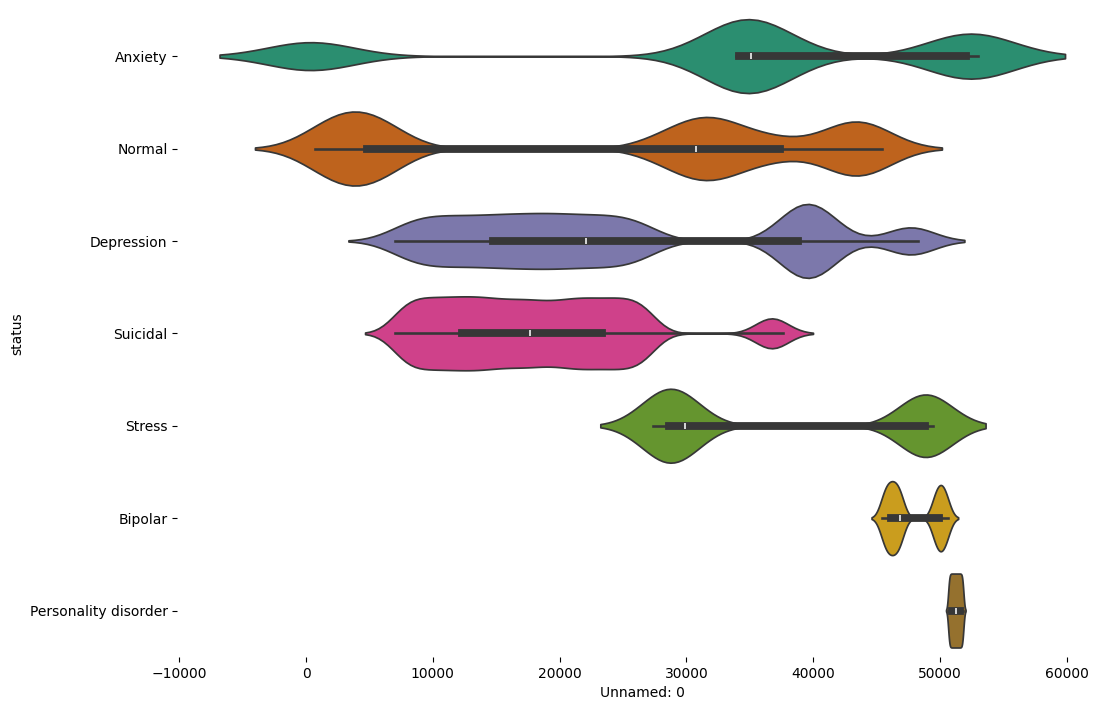

In [20]:
import seaborn as sns
figsize = (12, 1.2 * len(DF['status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(DF, x='Unnamed: 0', y='status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

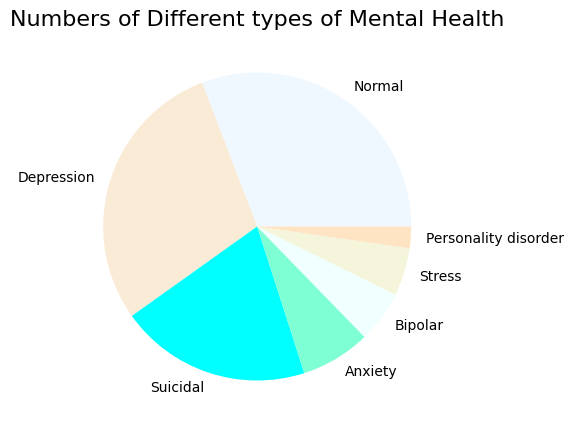

In [22]:
fig, ax = plt.subplots(figsize = (5,5))

random_colors = [color for name,color in mp.colors.cnames.items()]
ax.pie(x = DF.status.value_counts(),
       labels = DF.status.value_counts().index,
       colors =random_colors,
    )
ax.set_title('Numbers of Different types of Mental Health', fontdict={'fontsize':16})

plt.show()

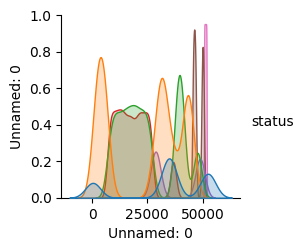

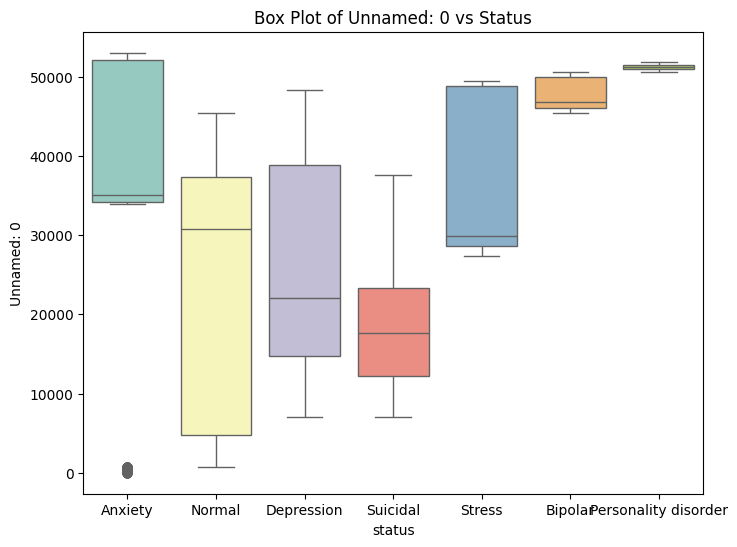

In [25]:
# Pairplot for visualization
sns.pairplot(DF, hue='status')
plt.show()

# Box plots for numerical features against status
for col in DF.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='status', y=col, data=DF, palette='Set3')
  plt.title(f'Box Plot of {col} vs Status')
  plt.show()

# Scatter plots for numerical features against each other, colored by status
for i in range(len(DF.select_dtypes(include=np.number).columns)):
  for j in range(i + 1, len(DF.select_dtypes(include=np.number).columns)):
    col1 = DF.select_dtypes(include=np.number).columns[i]
    col2 = DF.select_dtypes(include=np.number).columns[j]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col1, y=col2, data=DF, hue='status', palette='viridis')
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.show()

# Example using plotly for an interactive plot
fig = px.histogram(DF, x='status', color='status', marginal="box")
fig.show()

# Example using plotly express for a more complex visualization (replace with your desired columns)
fig = px.scatter_3d(DF, x='Unnamed: 0', y='status', z='Unnamed: 0',
              color='status')
fig.show()


-- Preprocessing --

In [27]:
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [26]:
random_statements = DF.groupby('status')['statement'].apply(lambda x: x.sample(n=1).iloc[0])
for status,statement in random_statements.items():
    print(f'Status: {status}')
    print(f'Statement: {statement}')
    print('-'*79)

Status: Anxiety
Statement: Getting a lot of trapped wind over the last few weeks My diet hasn't changed at all so I doubt it's intolerance. There isn't any blood in my stool and I have no issues in going to the toilet. 

Any ideas on what's going on? 
-------------------------------------------------------------------------------
Status: Bipolar
Statement: Experiences with Lithium? My doctor prescribed me lithium 300mg ER twice a day. I have been extremely reluctant to start the medicine because of the dumbest reason ever, the notorious weight gain. 
I take care of myself pretty well with the exception of a few beers every other weekend or so (definitely nowhere near drunk). I go to the gym 4-5 days a week and eat relatively healthy. I just recently lost a few pounds, and am still trying to lose more (personal preference, I'm a healthy weight). I drink probably around 10 glasses of water a day. Does anyone have experience with weight gain on the med? I read online that part of it can b

In [28]:
def preprocess(text, lemmatize = False, stem = False):
    text = text.replace('\n', ' ').replace('\r', ' ').strip()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    tokens = word_tokenize(text.lower())
    pattern = re.compile(r"[a-z-A-Z-0-9]+")

    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    tokens = [word for word in tokens if pattern.fullmatch(word) and word not in stop_words and len(word) > 1]
    if lemmatize:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    if stem:
        tokens = [stemmer.stem(word) for word in tokens]

    return tokens

In [37]:
def preprocess(text, lemmatize=False, stem=False):
    if not isinstance(text, str):
        return ""

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    tokens = word_tokenize(text.lower())
    pattern = re.compile(r"[a-zA-Z0-9]+")
    tokens = [token for token in tokens if pattern.match(token)]

    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    if stem:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]

    return " ".join(tokens)


In [38]:
DF['preprocessed'] = DF.statement.progress_apply(preprocess)

  0%|          | 0/53043 [00:00<?, ?it/s]

In [39]:
random_value = np.random.randint(0,DF.shape[0])
print("Status:",DF['status'].iloc[random_value])
print("Preprocessed Tokens:",DF['preprocessed'].iloc[random_value])

Status: Normal
Preprocessed Tokens: have you tried earplugs


In [40]:
from collections import Counter
cnt = Counter()
for text in DF["preprocessed"].values:
    for word in text:
        cnt[word] += 1

In [41]:
n_words = 20
FREQWORDS = set([w for (w, wc) in cnt.most_common(n_words)])
print(FREQWORDS)

{'h', 'w', 'f', 'l', 'e', 'g', 'p', 'c', 'm', 'o', ' ', 'i', 's', 'a', 'n', 't', 'd', 'y', 'r', 'u'}


In [42]:
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_words-1:-1]])
print(RAREWORDS)

{'😹', '♂', '🤩', '\u202d', '×', 'ı', '🫢', '🙋', '🤫', '🥳', '😊', '》', '⏳', '☺', '🥺', '😩', '💖', '\u202c', 'ư', '🫤'}


-- Wordcloud --

In [44]:
tokens_data = ' '.join([' '.join(item) for item in DF.preprocessed.values])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tokens_data)

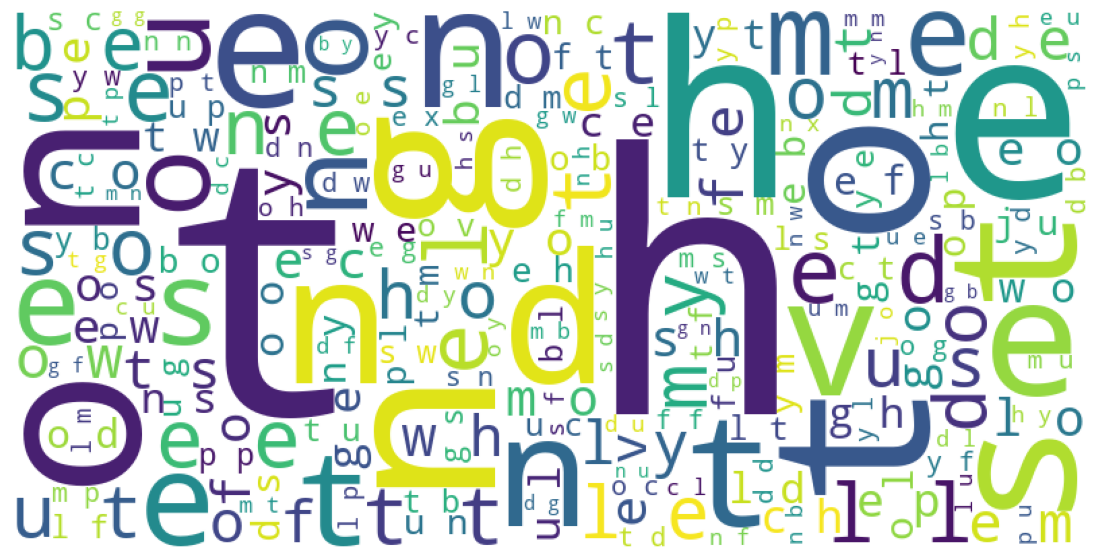

In [45]:
plt.figure(figsize = (15,7))
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

-- Prepare Data --


In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


from tqdm.notebook import tqdm; tqdm.pandas();

In [46]:
DF.head()

,Unnamed: 0,statement,status,preprocessed
0,0,oh my gosh,Anxiety,oh my gosh
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,all wrong back off dear forward doubt stay in ...
3,3,I've shifted my focus to something else but I'...,Anxiety,i shifted my focus to something else but i sti...
4,4,"I'm restless and restless, it's been a month n...",Anxiety,i restless and restless it been a month now bo...


In [47]:
DF['status'].values

array(['Anxiety', 'Anxiety', 'Anxiety', ..., 'Anxiety', 'Anxiety',
       'Anxiety'], dtype=object)

In [50]:
encoder = LabelEncoder()
labels = encoder.fit_transform(DF['status'].values)
labels

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
X = DF['preprocessed'].values
print(X[:5])

['oh my gosh'
 'trouble sleeping confused mind restless heart all out of tune'
 'all wrong back off dear forward doubt stay in a restless and restless place'
 'i shifted my focus to something else but i still worried'
 'i restless and restless it been a month now boy what do you mean']


In [52]:
X.shape

(53043,)

In [53]:
labels.shape

(53043,)

-- Data Spliting --

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.2, random_state = 42)


In [60]:
print(X_train[:3])

['h o w   d o   y o u   m a k e   e y e   c o n t a c t   w i t h   p e o p l e   i   r e a l l y   s t r u g g l e   w i t h   t h i s   i n   p e r s o n   a n d   a l s o   a t   w o r k   o n   w e b c a m   w h e n e v e r   i   l o o k   a t   p e o p l e s   e y e s   i t   f e e l s   l i k e   a   k i n d   o f   b u r n i n g   t h e n   i t   j u s t   i n d u c e s   a   h o r r i b l e   p a n i c   f e e l i n g   t o o   i   w a s   o n c e   t o l d   i n   t h e r a p y   t o   l o o k   o v e r   a   p e r s o n   s   s h o u l d e r   i n s t e a d   b u t   p e o p l e   e n d   u p   s a y i n g   w h a t   a r e   y o u   l o o k i n g   a t   i   j u s t   f e e l   s o   a b n o r m a l   n o t   b e i n g   a b l e   t o   d o   t h i s', 'b a l a n c i n g   s c h o o l   s o c i a l   l i f e   a n d   w o r k   h o w   t o   d o   b a l a n c e   y o u r   s c h o o l   a n d   w o r k i n g   l i f e   a r e   y o u   w o r k i n g   a n d   a t t e n d i n

In [58]:
X_train = [i for i in X_train if len(i) > 0]
X_train = [' '.join(i) for i in X_train if len(i) > 0]

In [66]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def preprocess(text, lemmatize=False, stem=False):
    # ... (rest of the function) ...

    # Customize stop words
    stop_words = set(stopwords.words('english'))  # Start with default English stop words
    # Remove or add words as needed
    stop_words.update(['word1', 'word2'])  # Add specific words
    stop_words.remove('not')  # Remove a word (e.g., 'not' is often important)

    tokens = [token for token in tokens if token not in stop_words and len(token) > 1]

    # ... (rest of the function) ...

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


-- Models --

In [63]:
models = {
"Logistic Regression":LogisticRegression(C = 10, max_iter=100),
"Random Forest":RandomForestClassifier(n_estimators=100),
"Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5),
"XGBoost": XGBClassifier(n_estimators=100,learning_rate =0.1, max_depth=5)
}

In [67]:
results = {}

for model_name, model in models.items():

    model.fit(X_train_tfidf, y_train)
    predicted_y = model.predict(X_test_tfidf)

    results[model_name] = {
        'model': model,
        'score': accuracy_score(y_test, predicted_y),
    }

    print(model_name)
    print(results[model_name])
    print('-'*100)

Logistic Regression
{'model': LogisticRegression(C=10), 'score': 0.7778301442171741}
----------------------------------------------------------------------------------------------------
Random Forest
{'model': RandomForestClassifier(), 'score': 0.6796116504854369}
----------------------------------------------------------------------------------------------------
Gradient Boosting
{'model': GradientBoostingClassifier(max_depth=5), 'score': 0.7601093411254595}
----------------------------------------------------------------------------------------------------
XGBoost
{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=No

In [68]:
# Confustion Matrixes
def print_confusion_matrix(y_test,model):

    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    con = confusion_matrix(y_true=y_test, y_pred=y_pred)
    labels = encoder.classes_
    ax = sns.heatmap(con, annot = True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
    ax.set_title(f'{type(model).__name__} - {acc:.2}%')
    plt.show()

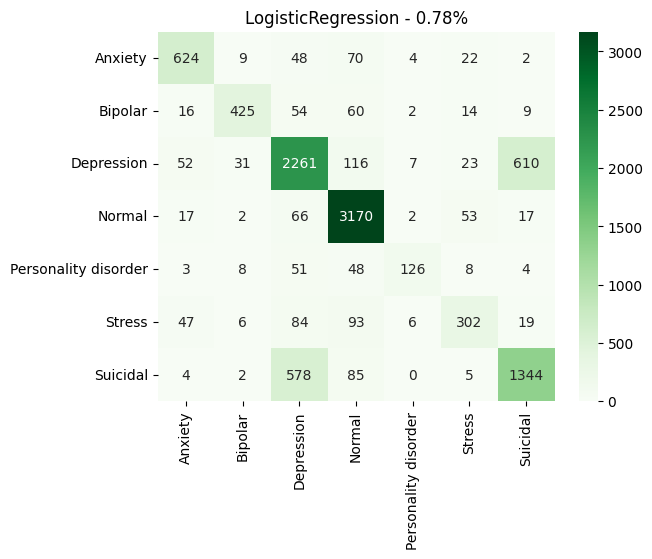

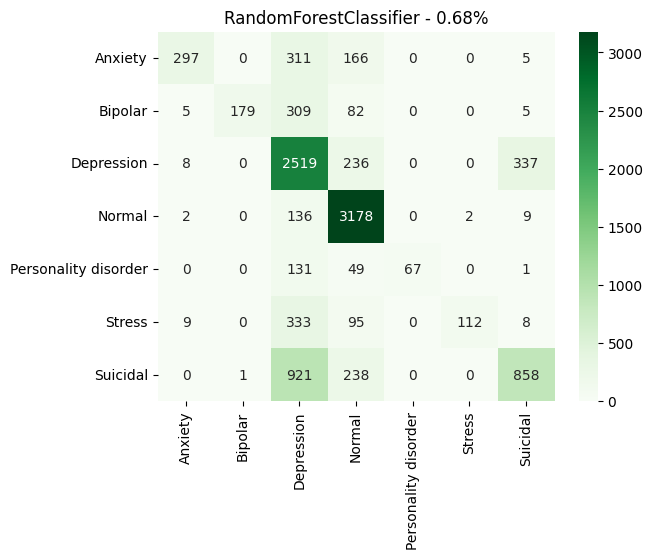

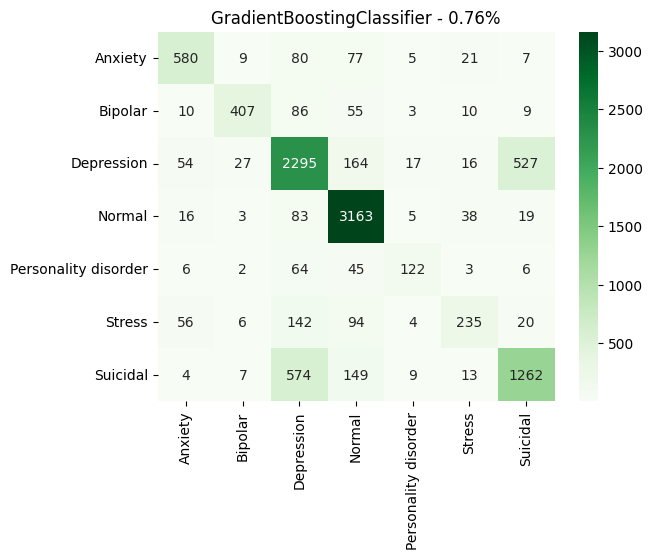

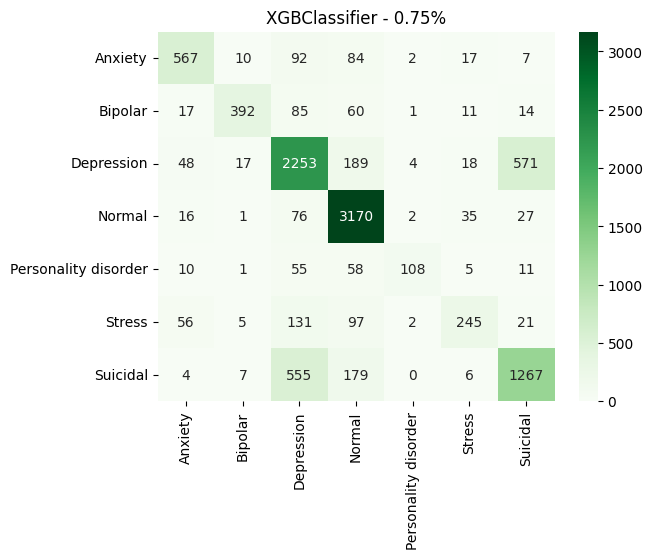

In [69]:
for model_name in results:
    model = results[model_name]['model']
    print_confusion_matrix(y_test,model)

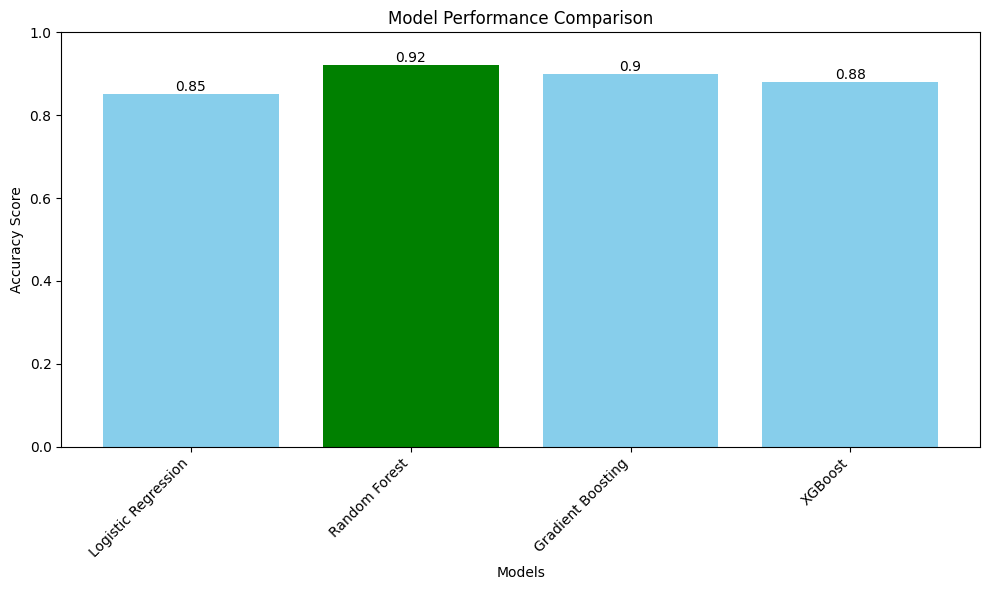

In [72]:
# Assuming 'results' dictionary is available from the previous code
model_names = list(results.keys())
accuracy_scores = [results[model]['score'] for model in model_names]

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color=['green' if score == max(accuracy_scores) else 'skyblue' for score in accuracy_scores])

# Add accuracy values on top of the bars
for bar, score in zip(bars, accuracy_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(score, 2), ha='center', va='bottom')

plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.xticks(rotation=45, ha="right") # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
